In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('..', 'eval_utils'))

if module_path not in sys.path:
    sys.path.append(module_path)

from eval_utils import DataAnalysis, DataQualityReport

In [3]:
df = pd.read_csv('osm_places_leisure.csv')

threshold = int(0.03* df.shape[0])
df = df.dropna(axis=1, thresh=threshold)

In [4]:
da = DataAnalysis("osm_places_leisure", df)

Number of rows: 418
Number of cols: 27



Column types:
id: int64
lat: float64
lon: float64
ele: float64
gnis:feature_id: float64
leisure: object
name: object
wikidata: object
addr:city: object
addr:postcode: float64
addr:state: object
operator: object
opening_hours: object
website: object
addr:street: object
addr:housenumber: object
dance:teaching: object
amenity: object
drink:beer: object
phone: object
toilets: object
wheelchair: object
tourism: object
cuisine: object
email: object
access: object
garden:type: object


 Convert column types to desired ones before continuing


Number of duplicate rows: 0
id 0
lat 0
lon 0
ele 248
gnis:feature_id 249
leisure 0
name 40
wikidata 265
addr:city 382
addr:postcode 372
addr:state 382
operator 397
opening_hours 384
website 348
addr:street 345
addr:housenumber 349
dance:teaching 359
amenity 391
drink:beer 404
phone 365
toilets 404
wheelchair 406
tourism 400
cuisine 401
email 405
access 397
garden:type 390


Value proportions:
leisure
park                0.483254
garden              0.224880
dance               0.200957
amusement_arcade    0.040670
escape_game         0.011962
ice_rink            0.011962
miniature_golf      0.009569
nature_reserve      0.007177
swimming_pool       0.007177
beach_resort        0.002392
Name: proportion, dtype: float64
name
NaN                             0.095694
Chuck E. Cheese                 0.011962
Rose Garden                     0.007177
Perennial Garden                0.004785
Barcade                         0.004785
                                  ...   
Garden Playground     

<Figure size 640x480 with 0 Axes>

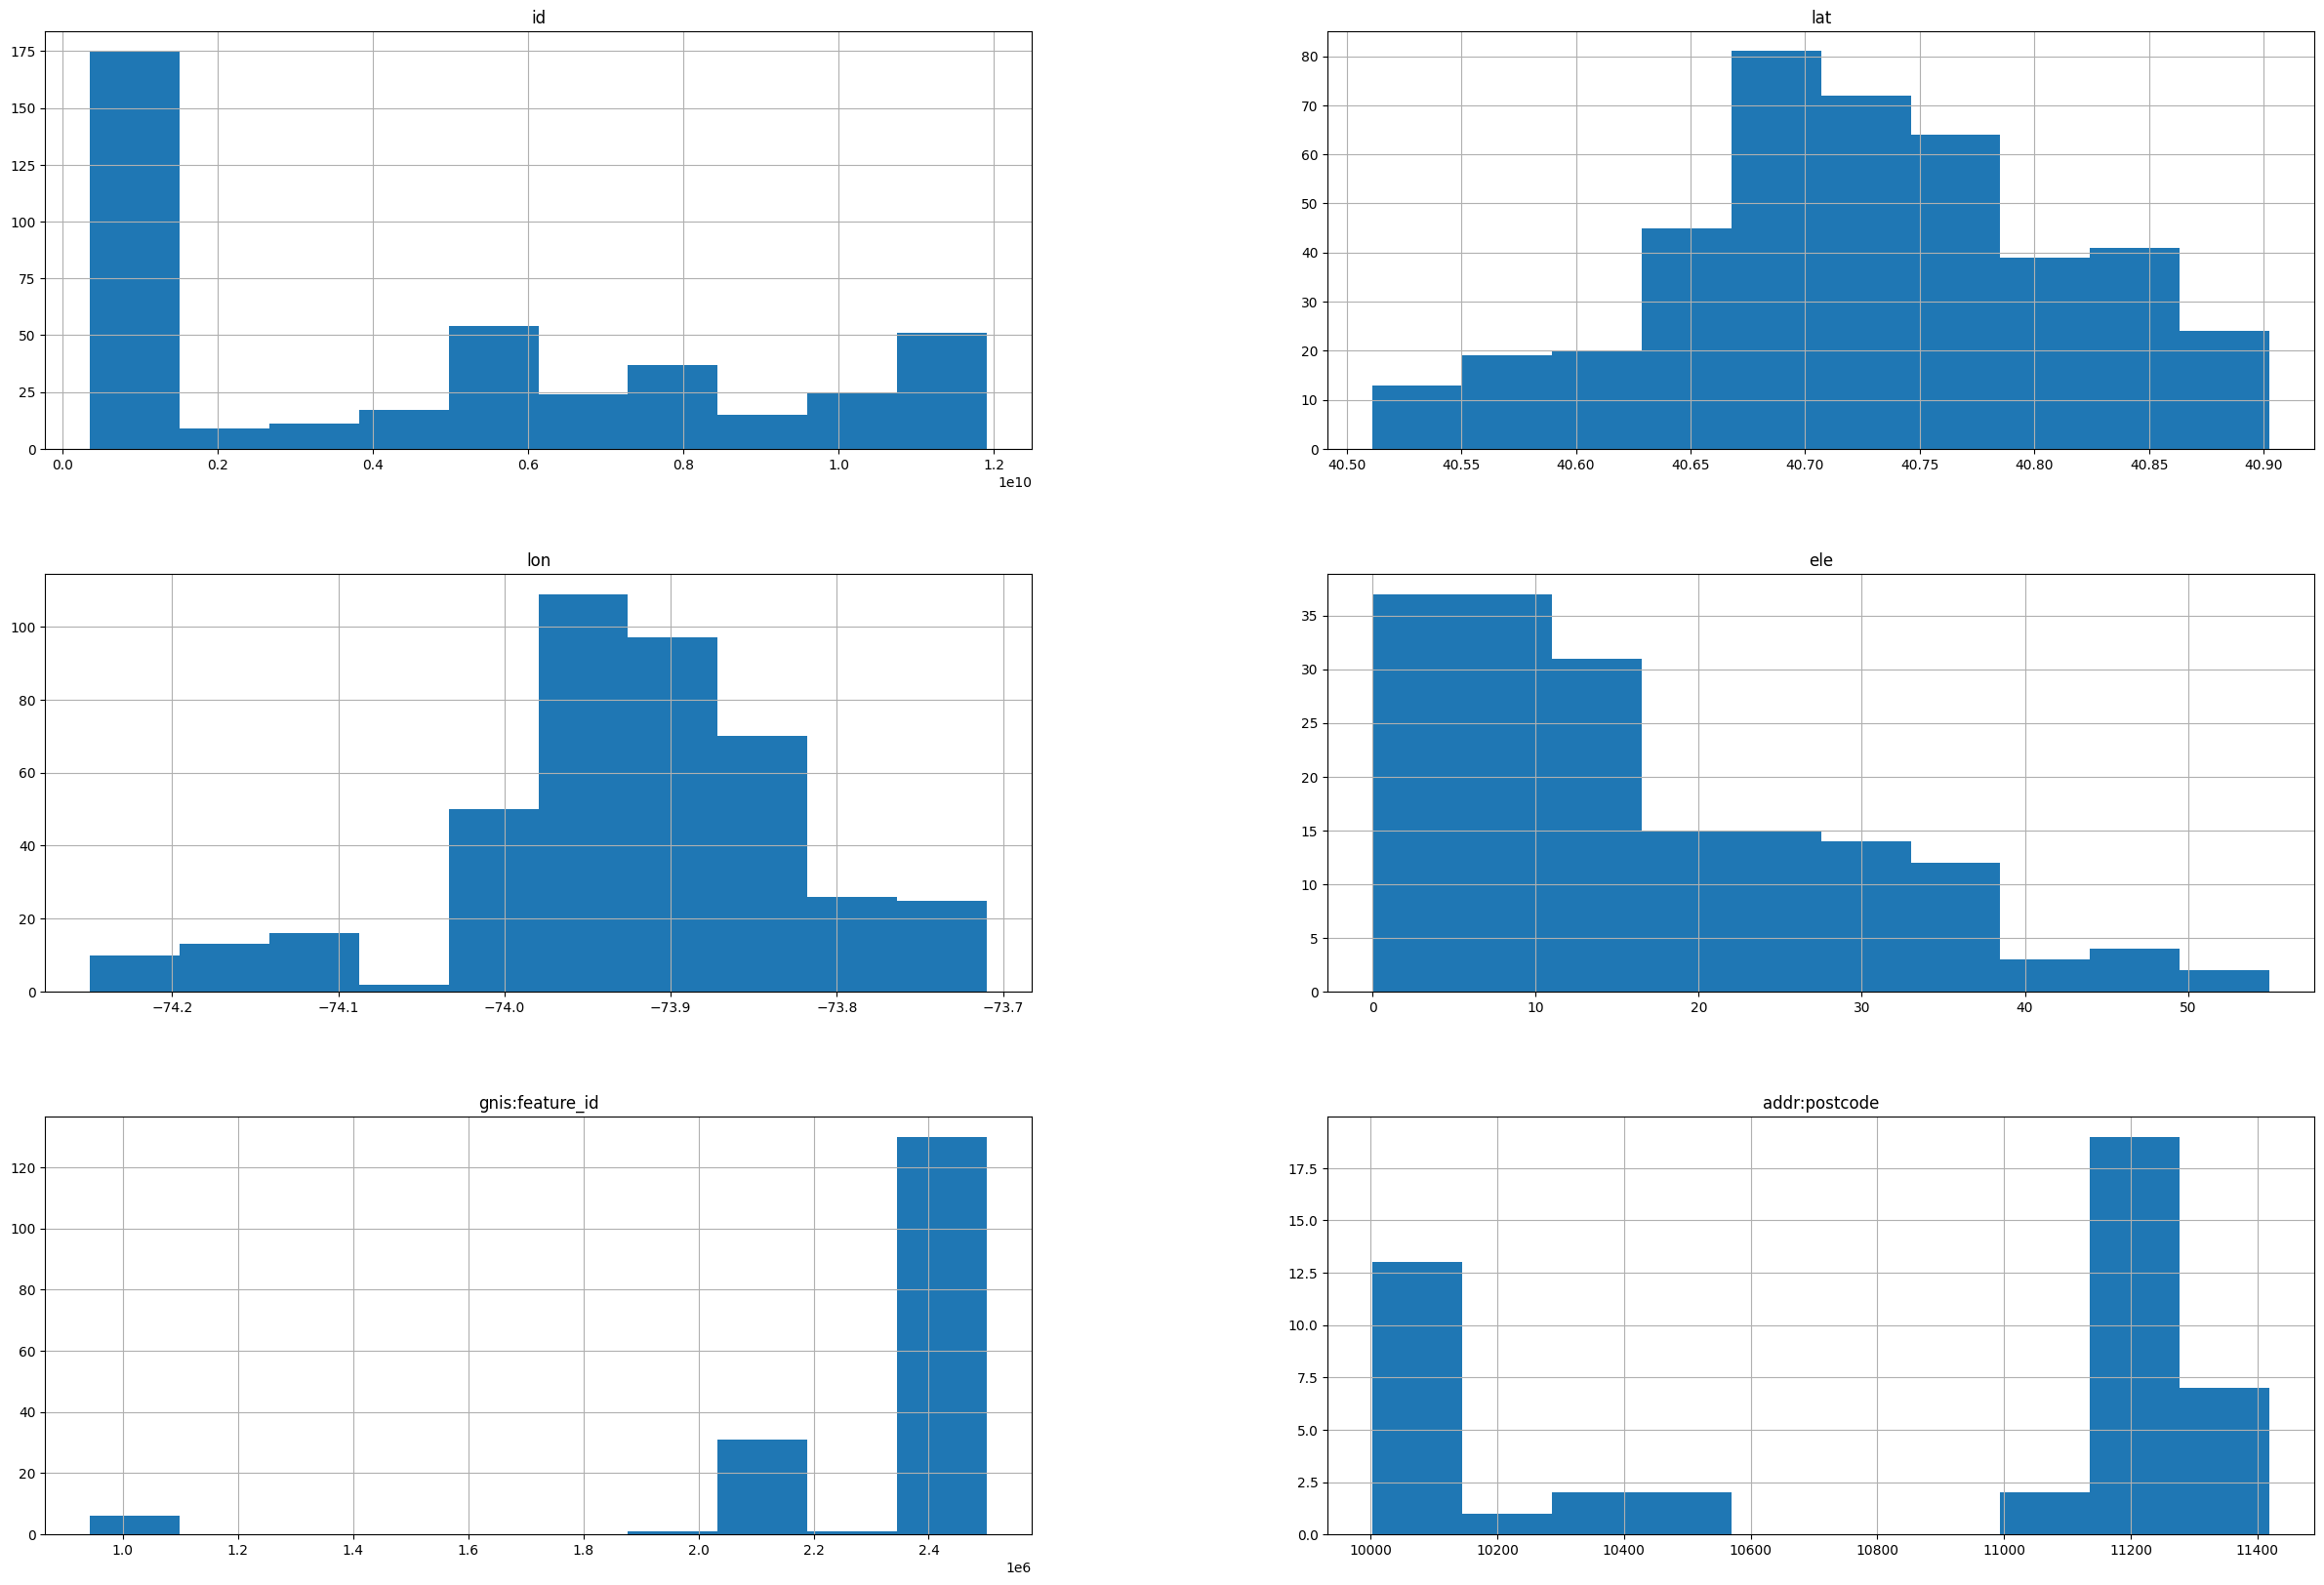

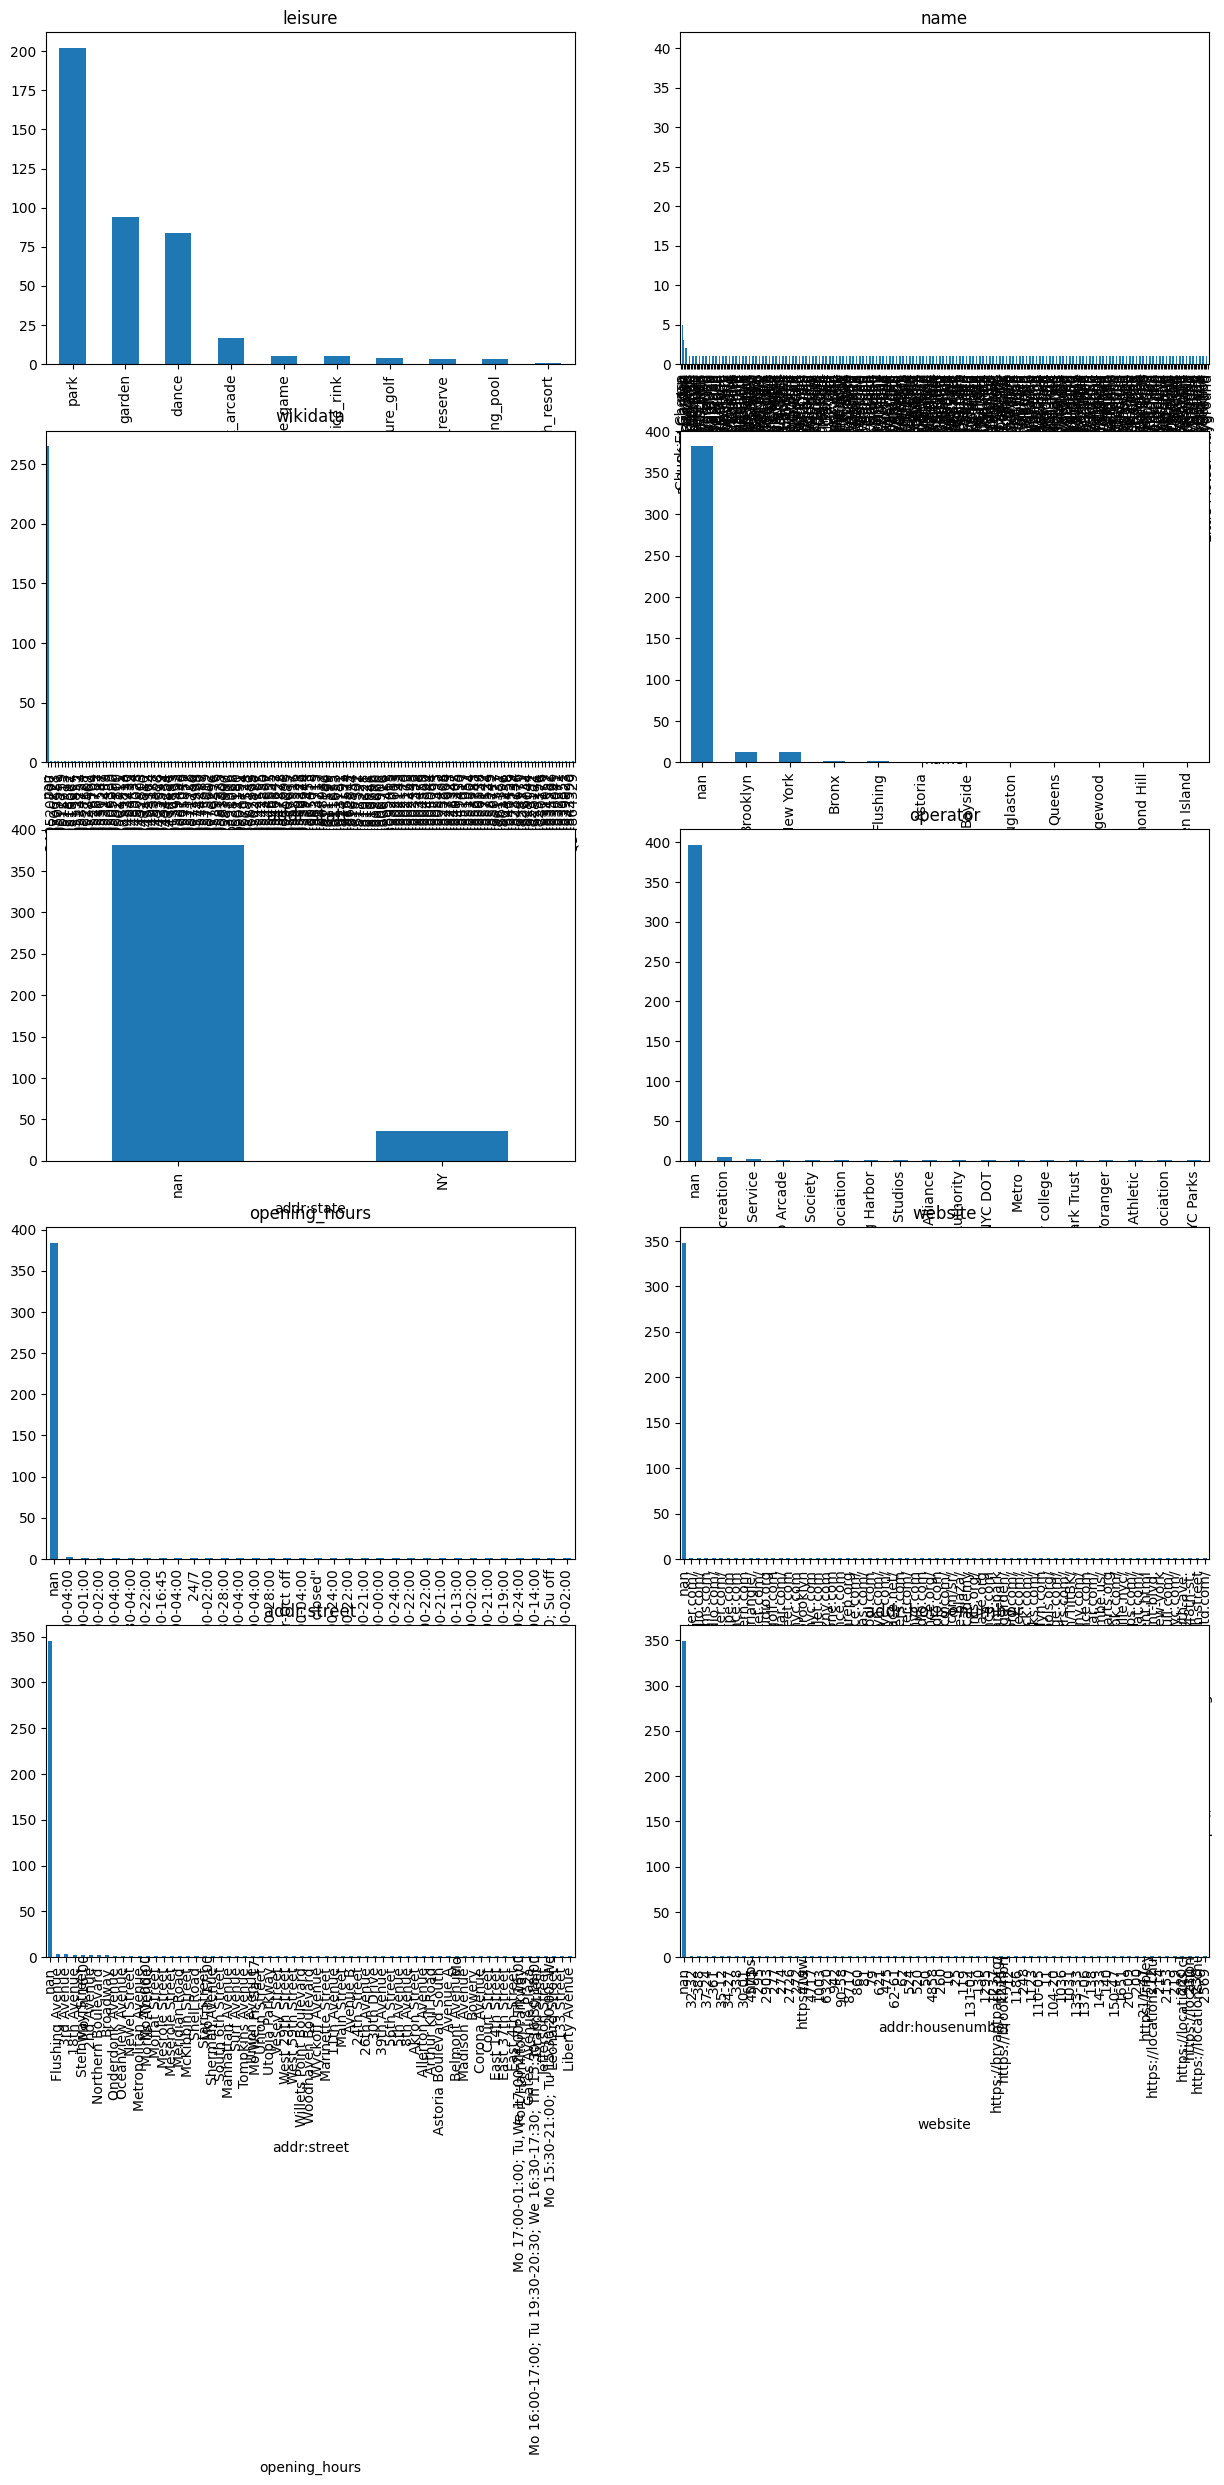

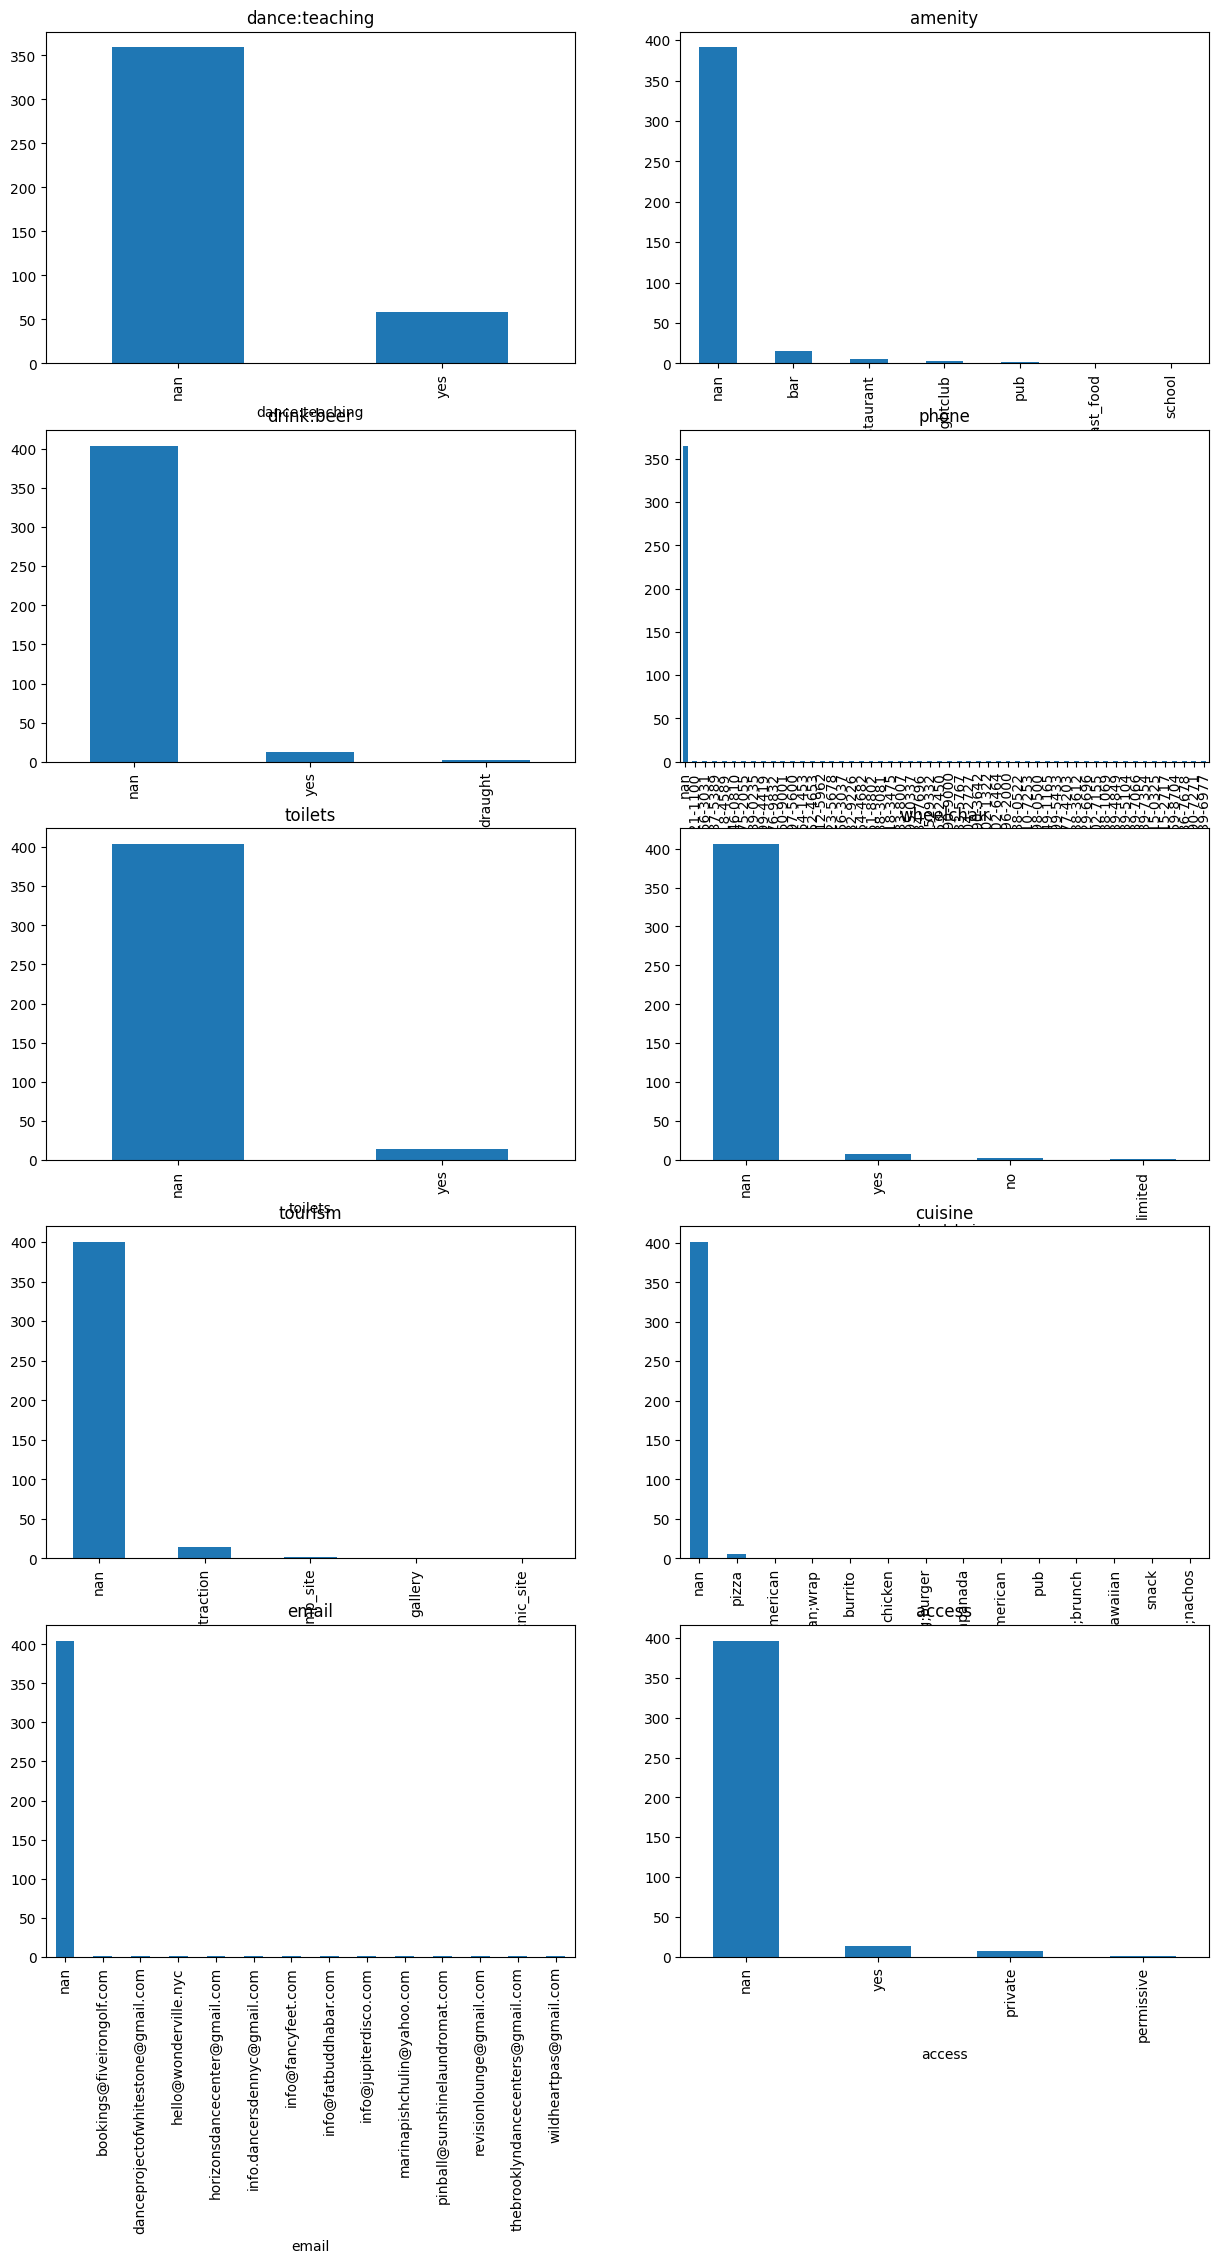

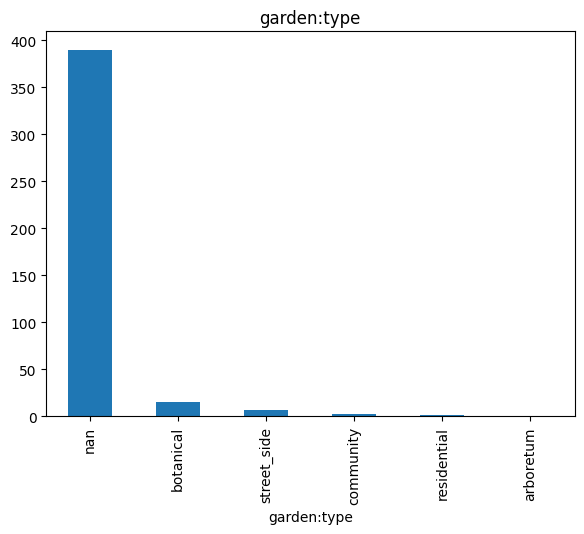

In [5]:
da.analyse()

In [6]:
from docx import Document
from docx.shared import Inches
import humanize

In [7]:
da.df['ele'].dtypes

dtype('float64')

In [8]:
params = {
    "title": "OSM Leisure",
    "description": "leisure",
    "source": "Overpass Turbo API",
    "detailed_desc": "information on different leisure places in New York City, including arcades, beach resorts, parks and stadiums",
    "source_link": "https://overpass-turbo.eu/"
}

dqr = DataQualityReport(da, params)
dqr.write_document()

### Logical Integrity Tests 
1. Address State not NY.
2. Website doesn't start with https://
3. 
4. 


In [9]:
# Test 1:
df[(df['addr:state'] != 'NY') & ~( df['addr:state'].isna())]

,id,lat,lon,ele,gnis:feature_id,leisure,name,wikidata,addr:city,addr:postcode,...,amenity,drink:beer,phone,toilets,wheelchair,tourism,cuisine,email,access,garden:type


In [10]:
# Test 2:
# df['website'] = df['website'].fillna('')
# df[df['website'].str.startswith('https://')]